<a href="https://colab.research.google.com/github/abaskon/Thesis/blob/main/GPR_and_DBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

In [41]:
dbi1 = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/DBI1985-2004.csv")
dbi2 = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/DBI2004-today.csv")

dbi1['Price'] = dbi1['Price'].str.replace(',', '').astype(float)
dbi2['Price'] = dbi2['Price'].str.replace(',', '').astype(float)

In [42]:
GPR = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/data_gpr_daily_recent.csv")
GPRE = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/data_gpr_export.csv")

GPR['GPRD'] = GPR['GPRD'].str.replace(',', '').astype(float)

In [43]:
dbi1['Date'] = pd.to_datetime(dbi1['Date'], format='%m/%d/%Y')
dbi2['Date'] = pd.to_datetime(dbi2['Date'], format='%m/%d/%Y')

In [44]:
GPR = GPR.rename(columns={'DAY': 'Date'})

In [45]:
GPR['Date'] = GPR['Date'].astype(str)
# Convert the 'Date' column to datetime format
GPR['Date'] = pd.to_datetime(GPR['Date'], format='%Y%m%d')

# Convert the 'Date' column to the '%m/%d/%Y' format
GPR['Date'] = GPR['Date'].dt.strftime('%Y-%m-%d')
GPR['Date'] = pd.to_datetime(GPR['Date'])


In [46]:
dbi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4999 non-null   datetime64[ns]
 1   Price     4999 non-null   float64       
 2   Open      4999 non-null   object        
 3   High      4999 non-null   object        
 4   Low       4999 non-null   object        
 5   Vol.      0 non-null      float64       
 6   Change %  4999 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 273.5+ KB


In [47]:
GPR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13993 entries, 0 to 13992
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         13993 non-null  datetime64[ns]
 1   N10D         13993 non-null  int64         
 2   GPRD         13993 non-null  float64       
 3   GPRD_ACT     13993 non-null  object        
 4   GPRD_THREAT  13993 non-null  float64       
 5   date         13993 non-null  object        
 6   GPRD_MA30    13993 non-null  float64       
 7   GPRD_MA7     13993 non-null  float64       
 8   event        11 non-null     object        
 9   var_name     9 non-null      object        
 10  var_label    9 non-null      object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 1.2+ MB


In [48]:
# concatenate the two tables based on the 'date' column
DBI = pd.concat([dbi1, dbi2]).drop_duplicates(subset='Date')
DBI = DBI.sort_values(by='Date', ascending=True)

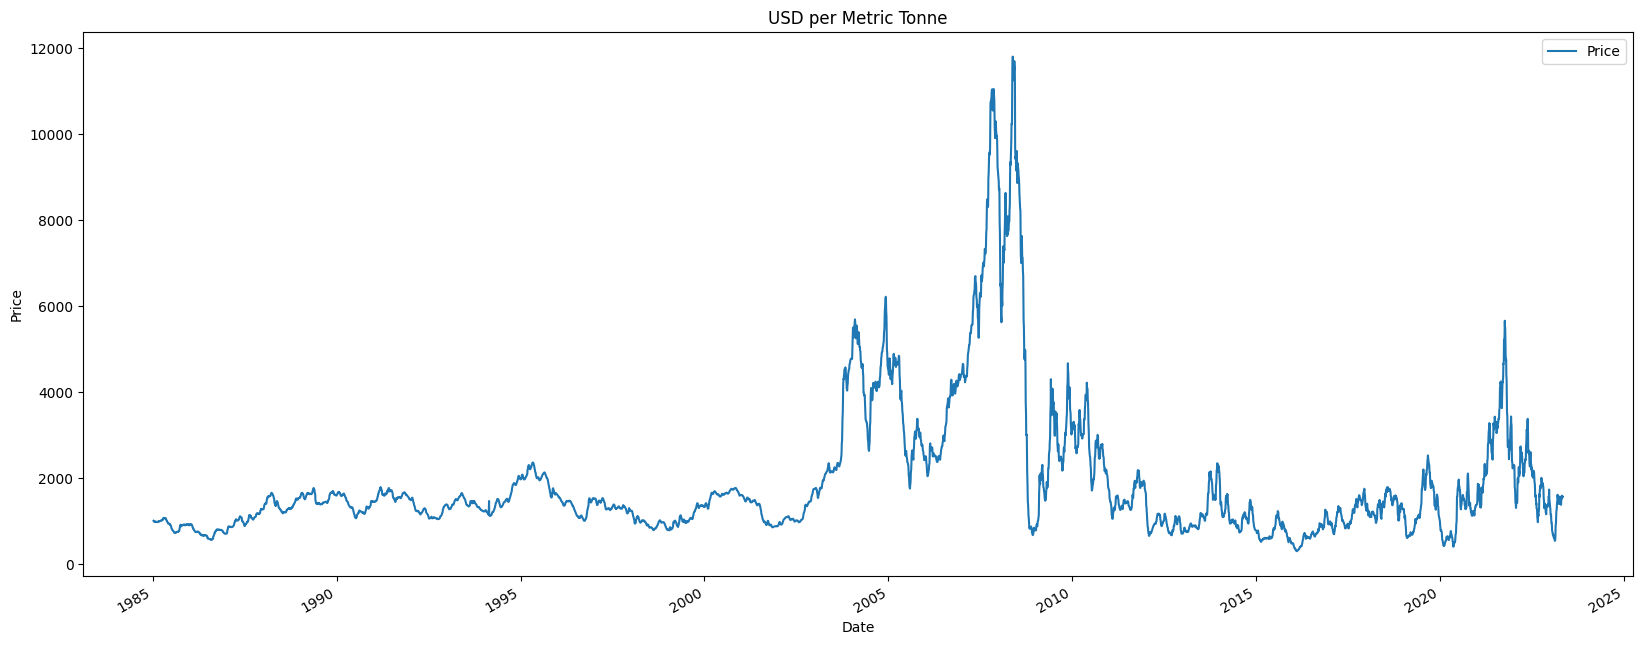

In [49]:
def plotgraph(df, x, y):
    df[y] = pd.to_numeric(df[y])
    df.plot(x=x, y=y, figsize=(20, 8))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('USD per Metric Tonne')
    plt.show()
plotgraph(DBI,'Date','Price')

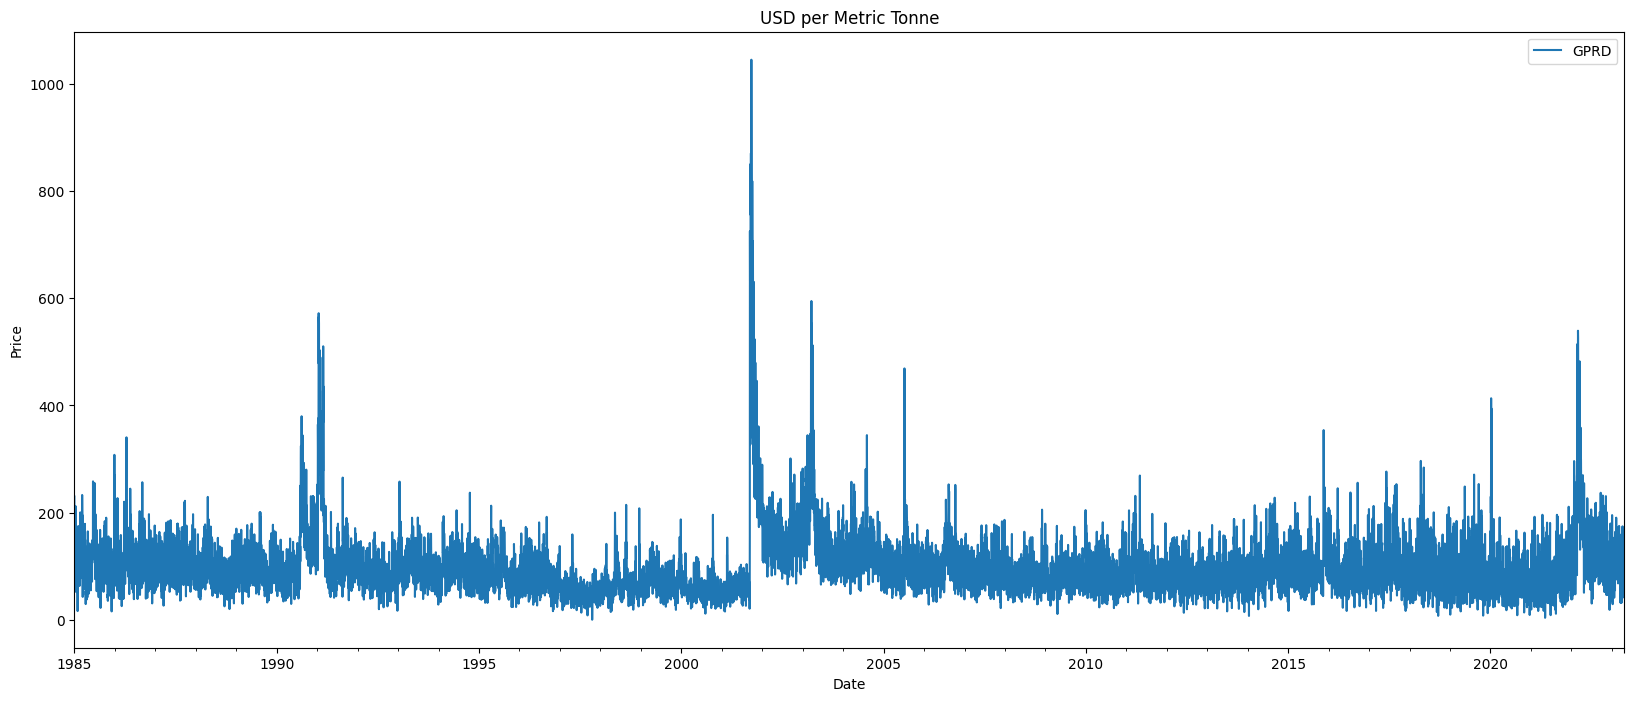

In [50]:
plotgraph(GPR,'Date','GPRD')

In [51]:
# Plotly line plot
fig = go.Figure(data=[go.Scatter(x=DBI['Date'], y=DBI['Price'])])
fig.show()


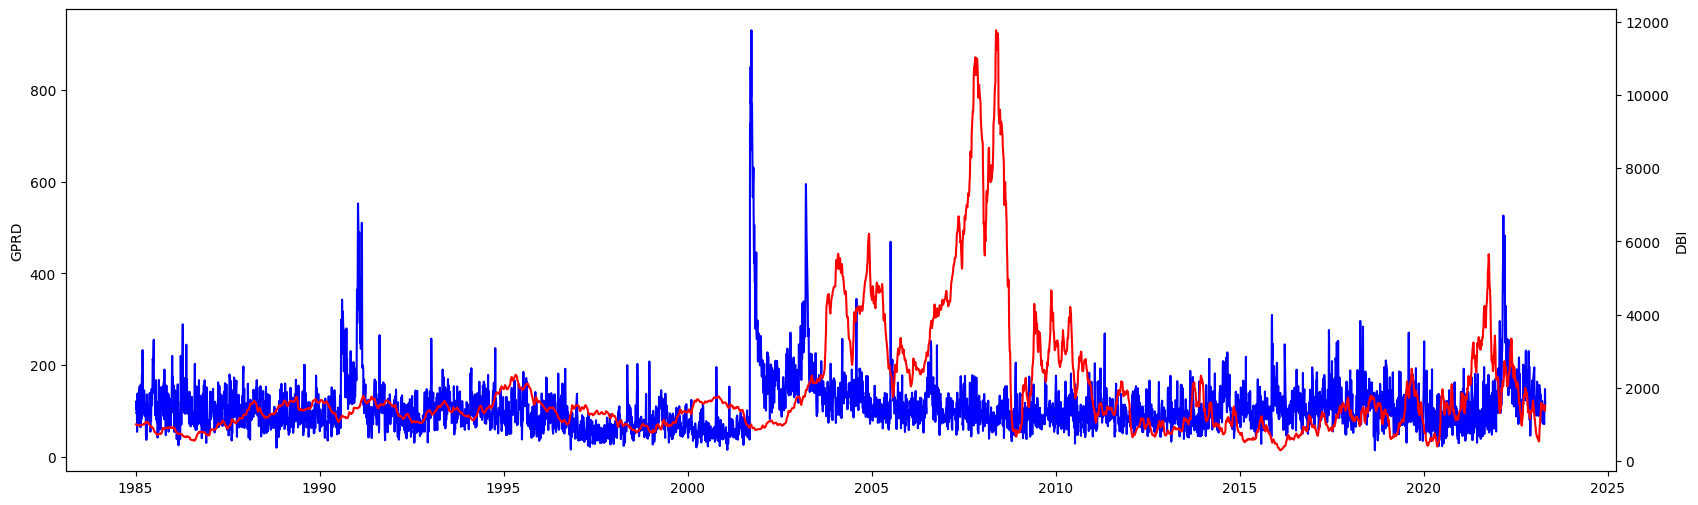

In [52]:

# Merge the two DataFrames based on the common x value
merged_df = pd.merge(DBI, GPR, on='Date')

# select every third row
merged_df = merged_df.iloc[::2, :]

import pandas as pd
import matplotlib.pyplot as plt


# create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(20, 6))

# plot the 'A' column on the first y-axis
ax1.plot(merged_df.Date, merged_df['GPRD'], color='blue')
ax1.set_ylabel('GPRD')

# create a second y-axis object
ax2 = ax1.twinx()

# plot the 'B' column on the second y-axis
ax2.plot(merged_df.Date, merged_df['Price'], color='red')
ax2.set_ylabel('DBI')

# normalize the two y-axis scales


# display the plot
plt.show()

In [53]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.995e+06. Parameter
estimation work better when this value is betwee

Iteration:      1,   Func. Count:      6,   Neg. LLF: 238513.23629905208
Iteration:      2,   Func. Count:     12,   Neg. LLF: 60454.55637827114
Iteration:      3,   Func. Count:     17,   Neg. LLF: 71582.15055224326
Iteration:      4,   Func. Count:     24,   Neg. LLF: 58397.873033338634
Iteration:      5,   Func. Count:     29,   Neg. LLF: 58388.551255015846
Iteration:      6,   Func. Count:     34,   Neg. LLF: 58353.56176929682
Iteration:      7,   Func. Count:     39,   Neg. LLF: 58340.54626613713
Iteration:      8,   Func. Count:     44,   Neg. LLF: 58335.23424186336
Iteration:      9,   Func. Count:     49,   Neg. LLF: 58335.1641583171
Iteration:     10,   Func. Count:     54,   Neg. LLF: 58335.1635781278
Iteration:     11,   Func. Count:     59,   Neg. LLF: 58335.16318663869
Iteration:     12,   Func. Count:     64,   Neg. LLF: 58335.16068336724
Iteration:     13,   Func. Count:     69,   Neg. LLF: 58335.15154643454
Iteration:     14,   Func. Count:     74,   Neg. LLF: 58335.138

/usr/local/lib/python3.10/dist-packages/arch/__future__/_utility.py:11: FutureWarning:


The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.




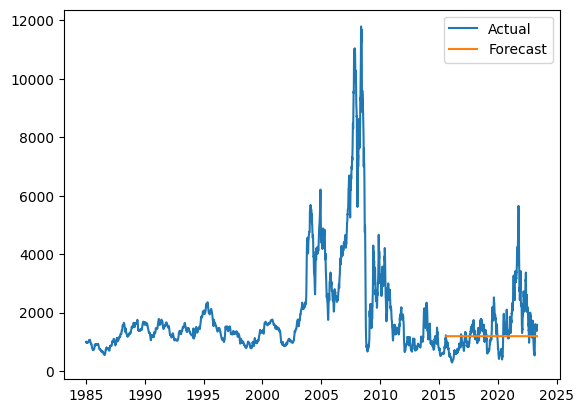

In [59]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import arch
from arch import arch_model
import matplotlib.pyplot as plt

# Load the DBI data

x = DBI['Date']
y = DBI['Price']

# Split the data into train and test sets
train_size = int(len(y) * 0.8)
train_y, test_y = y.iloc[:train_size], y.iloc[train_size:]
train_x, test_x = x[:train_size], x[train_size:]

# Fit a FARIMA model to the training data
from statsmodels.tsa.arima.model import ARIMA
farima_model = ARIMA(train_y, order=(1, 1, 1)).fit()


# Use the model to forecast the test set
farima_forecast = farima_model.forecast(steps=len(test_y)).values[0]


# Fit a GARCH model to the training data
garch_model = arch_model(train_y, p=1, q=1, mean='AR', vol='GARCH').fit()

# Use the model to forecast the test set
garch_forecast = garch_model.forecast(horizon=len(test_y))

# Combine the two forecasts using a weighted average
forecast = (0.5 * farima_forecast) + (0.5 * garch_forecast.mean.iloc[-1].values)

# Plot the actual and forecasted DBI data
plt.plot(x, y, label='Actual')
plt.plot(test_x, forecast, label='Forecast')
plt.legend()
plt.show()

In [55]:
x = DBI['Date']
y = DBI['Price']

start_date = x.iloc[0]
start_date

Timestamp('1985-01-07 00:00:00')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning:

y is poorly scaled, which ma

Iteration:      1,   Func. Count:      7,   Neg. LLF: 133514432608.06712
Iteration:      2,   Func. Count:     23,   Neg. LLF: 2241857759.4829965
Iteration:      3,   Func. Count:     36,   Neg. LLF: 345323.5147142197
Iteration:      4,   Func. Count:     52,   Neg. LLF: 4.099358396400357e+17
Iteration:      5,   Func. Count:     68,   Neg. LLF: 3804872666.062133
Iteration:      6,   Func. Count:     81,   Neg. LLF: -2904.7206944380223
Iteration:      7,   Func. Count:     87,   Neg. LLF: -5267.645331522277
Iteration:      8,   Func. Count:     93,   Neg. LLF: 912749.5498600276
Iteration:      9,   Func. Count:    100,   Neg. LLF: 20695565.597198028
Iteration:     10,   Func. Count:    116,   Neg. LLF: 2.2862129616215786e+22
Iteration:     11,   Func. Count:    132,   Neg. LLF: 107262783086.81306
Iteration:     12,   Func. Count:    147,   Neg. LLF: -6411.117131520234
Iteration:     13,   Func. Count:    154,   Neg. LLF: 622714.0236976172
Iteration:     14,   Func. Count:    168,   Neg

/usr/local/lib/python3.10/dist-packages/arch/__future__/_utility.py:11: FutureWarning:


The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.




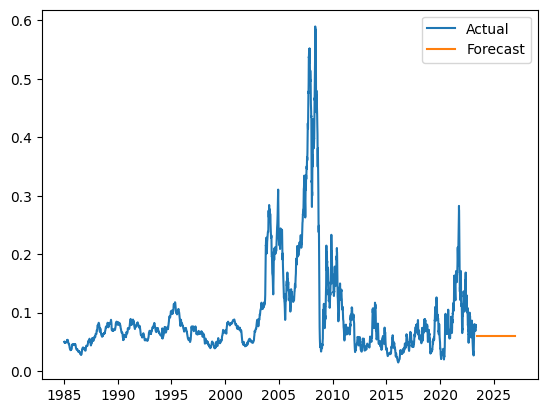

In [67]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import arch
from arch import arch_model
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the DBI data
x = DBI['Date']
y = DBI['Price']*0.00005

# Split the data into train and test sets
train_size = int(len(y) * 0.8)
train_y, test_y = y.iloc[:train_size], y.iloc[train_size:]
train_x, test_x = x[:train_size], x[train_size:]

# Fit a FARIMA model to the training data
from statsmodels.tsa.arima.model import ARIMA
farima_model = ARIMA(train_y, order=(3, 2, 1)).fit()

# Generate dates for the forecasted values
start_date = x.iloc[-1]
end_date = pd.to_datetime('2027-01-01')  # Change this to your desired end date
freq = 'M'  # Change this to your desired frequency
forecast_x = pd.date_range(start=start_date, end=end_date, freq=freq)

# Use the model to forecast the future values
farima_forecast = farima_model.forecast(steps=len(forecast_x)).values[0]

# Fit a GARCH model to the training data
garch_model = arch_model(train_y, p=1, q=2, mean='AR', vol='GARCH').fit()

# Use the model to forecast the future values
garch_forecast = garch_model.forecast(horizon=len(forecast_x))

# Combine the two forecasts using a weighted average
forecast = (0.5 * farima_forecast) + (0.5 * garch_forecast.mean.iloc[-1].values)

# Plot the actual and forecasted DBI data
plt.plot(x, y, label='Actual')
plt.plot(forecast_x, forecast, label='Forecast')
plt.legend()
plt.show()


In [57]:
#granger causality test